
# Ana María Sánchez Corredor

# 15 de noviembre de 2023

# 1. Exploración del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#se crea el enlace
url = 'https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/cars1.csv'
#Se genera el objeto dataframe
df = pd.read_csv(url, delimiter = ',')
#inspección visual
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [ ]:
#información general del dataframe
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

In [ ]:
df.shape

(198, 14)

# Observaciones
- El DataFrame parece contener información relacionada con automóviles, con columnas como 'mpg' (millas por galón), 'cylinders' (número de cilindros), 'displacement' (desplazamiento), 'weight' (peso), 'acceleration' (aceleración), 'model' (modelo), 'origin' (origen) y varias columnas sin nombre (Unnamed: 9 a Unnamed: 13).
- Hay 198 observaciones en el DataFrame para todas las columnas. Esto se deduce de la fila 'count', que muestra el recuento de valores no nulos para cada columna.
- Se observa la presencia de valores 'NaN' en las columnas Unnamed: 9 a Unnamed: 13. Esto indica que estas columnas no contienen datos válidos y podrían ser eliminadas o requerir más exploración.

In [ ]:
#Borramos las columnas unnamed para no tener problemas en el procesamiento
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=unnamed_columns, axis=1)

In [ ]:
#Datos duplicados
df.duplicated().sum()

0

In [ ]:
#Datos nulos por columna
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [ ]:
#Datos nulos en total
df.isnull().sum().sum()

0

# Objetivo: Predecir el rendimiento en millas por galón (mpg) de un automóvil en función de diversas características como el número de cilindros (cylinders), el desplazamiento (displacement), la potencia en caballos de fuerza (horsepower), el peso (weight), la aceleración (acceleration), el año del modelo (model), el origen (origin) y el nombre del automóvil (car).

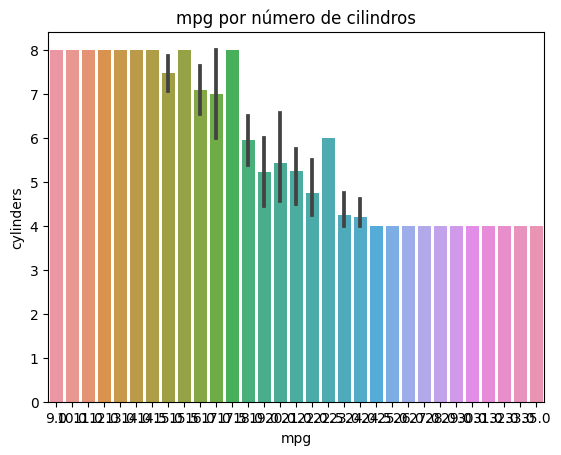

In [ ]:
sns.barplot(x= "mpg", y = "cylinders", data = df).set(title='mpg por número de cilindros')
plt.show()

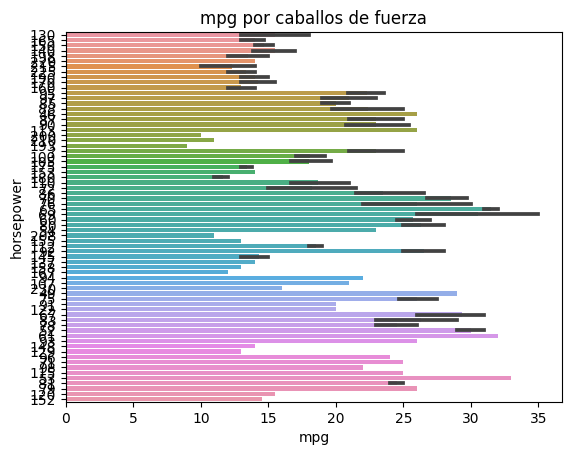

In [ ]:
sns.barplot(x= "mpg", y = "horsepower", data = df).set(title='mpg por caballos de fuerza')
plt.show()

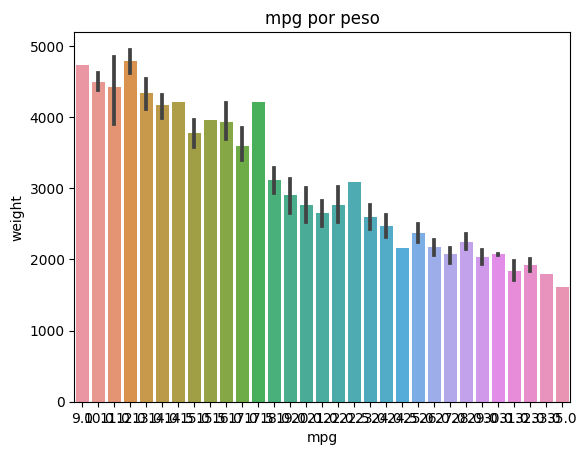

In [ ]:
sns.barplot(x= "mpg", y = "weight", data = df).set(title='mpg por peso')
plt.show()

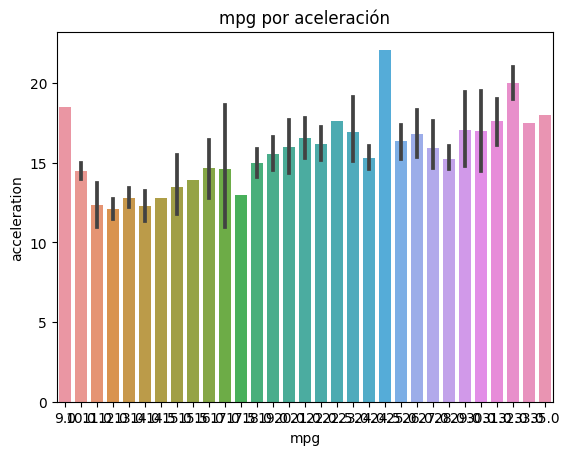

In [ ]:
sns.barplot(x= "mpg", y = "acceleration", data = df).set(title='mpg por aceleración')
plt.show()

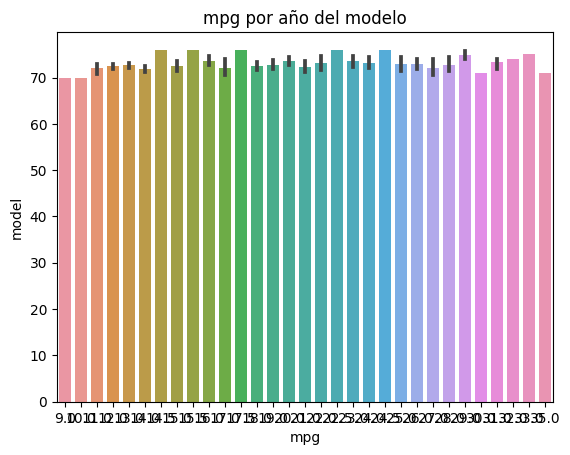

In [ ]:
sns.barplot(x= "mpg", y = "model", data = df).set(title='mpg por año del modelo')
plt.show()


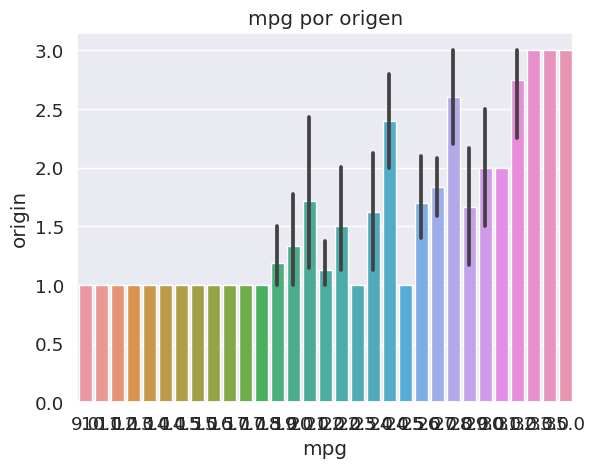

In [ ]:
sns.barplot(x= "mpg", y = "origin", data = df).set(title='mpg por origen')
plt.show()


# 2. Preprocesamiento para modelado

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.866787     -0.885137 -0.904237      0.531879   
cylinders    -0.866787   1.000000      0.956238  0.911898     -0.635546   
displacement -0.885137   0.956238      1.000000  0.932328     -0.675470   
weight       -0.904237   0.911898      0.932328  1.000000     -0.558045   
acceleration  0.531879  -0.635546     -0.675470 -0.558045      1.000000   
model         0.181791  -0.165582     -0.195392 -0.080858      0.296064   
origin        0.657652  -0.663362     -0.663778 -0.619625      0.264345   

                 model    origin  
mpg           0.181791  0.657652  
cylinders    -0.165582 -0.663362  
displacement -0.195392 -0.663778  
weight       -0.080858 -0.619625  
acceleration  0.296064  0.264345  
model         1.000000  0.030047  
origin        0.030047  1.000000  


<ipython-input-20-577361b548b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-19-134bf2387a9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, vmax=1, annot = True, linewidth = .5)


<Axes: >

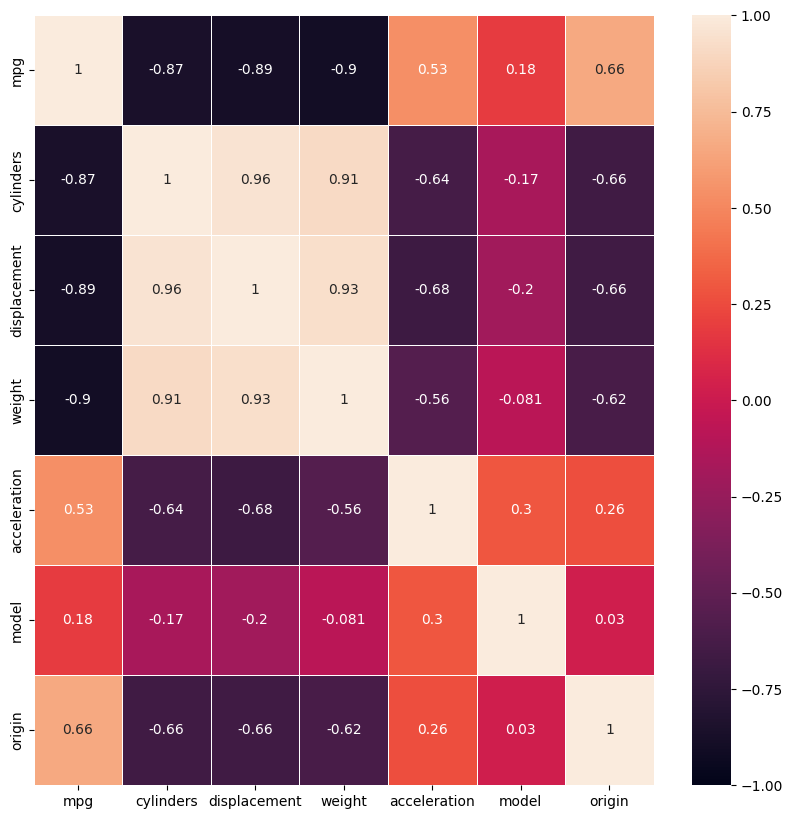

In [ ]:
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(), vmin = -1, vmax=1, annot = True, linewidth = .5)

# Observaciones
- La variable 'mpg' (millas por galón) tiene una correlación negativa fuerte con 'cylinders' (-0.866787), 'displacement' (-0.885137), y 'weight' (-0.904237). Esto sugiere que a medida que el número de cilindros, el desplazamiento y el peso del automóvil aumentan, el rendimiento tiende a disminuir.
-La variable 'mpg' tiene una correlación negativa moderada con 'acceleration' (-0.558045). Esto indica que a medida que la aceleración disminuye, el rendimiento tiende a aumentar.
- La variable 'mpg' tiene una correlación positiva moderada con 'origin' (0.657652). Esto sugiere que hay una relación moderadamente positiva entre el rendimiento y el origen del automóvil.
- La variable 'mpg' tiene una correlación relativamente débil con 'model' (0.181791), lo que sugiere que el año del modelo no tiene una influencia significativa en el rendimiento del automóvil.

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['cylinders', 'displacement', 'weight', 'acceleration']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la normalización a las columnas seleccionadas
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Muestra el DataFrame después de la normalización
print(df.head())

    mpg  cylinders  displacement horsepower    weight  acceleration  model  \
0  18.0   1.179744      0.727047        130  0.349747     -1.049016     70   
1  15.0   1.179744      1.101319        165  0.552445     -1.223529     70   
2  18.0   1.179744      0.822791        150  0.276818     -1.398041     70   
3  16.0   1.179744      0.700935        150  0.273601     -1.049016     70   
4  17.0   1.179744      0.683527        140  0.290761     -1.572554     70   

   origin                        car  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# 3. Procesamiento

En este problema de predicción de eficiencia de combustible (mpg), la elección entre regresión lineal y Random Forest se basa en la naturaleza de la relación entre las características del vehículo y la variable objetivo. La regresión lineal se selecciona cuando se presume que la relación es principalmente lineal, proporcionando una interpretación clara de la influencia de cada característica. Por otro lado, Random Forest se elige cuando se anticipa una relación no lineal o compleja, ya que puede capturar patrones más sutiles y manejar interacciones entre características

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model1LR = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model1LR.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model1LR.predict(X_test)

# Evaluar el rendimiento del modelo
mse1LR = mean_squared_error(y_test, y_pred)
r2_1LR = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse1LR}')
print(f'R^2 Score (Random Forest): {r2_1LR}')

Mean Squared Error (Random Forest): 5.321349017181537
R^2 Score (Random Forest): 0.8244494368014174


In [ ]:
# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=32)

# Crear un modelo de regresión lineal
model2LR = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model2LR.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model2LR.predict(X_test)

# Evaluar el rendimiento del modelo
mse2LR = mean_squared_error(y_test, y_pred)
r2_2LR = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse2LR}')
print(f'R^2 Score (Random Forest): {r2_2LR}')

Mean Squared Error (Random Forest): 5.21556428156409
R^2 Score (Random Forest): 0.8485765792153609


In [ ]:
# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=52)

# Crear un modelo de regresión lineal
model3LR = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model3LR.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model3LR.predict(X_test)

# Evaluar el rendimiento del modelo
mse3LR = mean_squared_error(y_test, y_pred)
r2_3LR = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse3LR}')
print(f'R^2 Score (Random Forest): {r2_3LR}')

Mean Squared Error (Random Forest): 5.588050076655814
R^2 Score (Random Forest): 0.8267570026653991


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de bosques aleatorios

random_forest_model1 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
random_forest_model1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model1.predict(X_test)

# Evaluar el rendimiento del modelo
mse1RF = mean_squared_error(y_test, y_pred)
r2_1RF = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse1RF}')
print(f'R^2 Score (Random Forest): {r2_1RF}')

Mean Squared Error (Random Forest): 5.584440625
R^2 Score (Random Forest): 0.8157700812890788


In [ ]:

# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de bosques aleatorios

random_forest_model2 = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=52)

# Entrenar el modelo con los datos de entrenamiento
random_forest_model2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model2.predict(X_test)

# Evaluar el rendimiento del modelo
mse2RF = mean_squared_error(y_test, y_pred)
r2_2RF = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse2RF}')
print(f'R^2 Score (Random Forest): {r2_2RF}')

Mean Squared Error (Random Forest): 5.443009726562501
R^2 Score (Random Forest): 0.8204358669374584


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selecciona las características (X) y la variable objetivo (y)
X = df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de bosques aleatorios

random_forest_model3 = RandomForestRegressor(n_estimators=600, max_depth=None, random_state=62)

# Entrenar el modelo con los datos de entrenamiento
random_forest_model3.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model3.predict(X_test)

# Evaluar el rendimiento del modelo
mse3RF = mean_squared_error(y_test, y_pred)
r2_3RF = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Random Forest): {mse3RF}')
print(f'R^2 Score (Random Forest): {r2_3RF}')

Mean Squared Error (Random Forest): 5.445502862152779
R^2 Score (Random Forest): 0.8203536187414482


 Tabla comparativa entre modelos

In [ ]:
# Crear un diccionario con los resultados
results = {
    'Modelo': ['Regresión Lineal 1', 'Regresión Lineal 2', 'Regresión Lineal 3',
               'Random Forest 1', 'Random Forest 2', 'Random Forest 3'],
    'Mean Squared Error': [mse1LR, mse2LR, mse3LR, mse1RF, mse2RF, mse3RF],
    'R^2 Score': [r2_1LR, r2_2LR, r2_3LR, r2_1RF, r2_2RF, r2_3RF]
}

# Crear un DataFrame a partir del diccionario
df_results = pd.DataFrame(results)

# Mostrar la tabla comparativa
print(df_results)

               Modelo  Mean Squared Error  R^2 Score
0  Regresión Lineal 1            5.321349   0.824449
1  Regresión Lineal 2            5.215564   0.848577
2  Regresión Lineal 3            5.588050   0.826757
3     Random Forest 1            5.584441   0.815770
4     Random Forest 2            5.443010   0.820436
5     Random Forest 3            5.445503   0.820354


# Observaciones
- El "Regresión Lineal 2" tiene el Mean Squared Error más bajo (5.215564), lo que indica un mejor rendimiento en términos de precisión en comparación con los otros modelos.
- El "Regresión Lineal 2" también tiene el R^2 Score más alto (0.848577), indicando una mejor capacidad de explicar la variabilidad en los datos en comparación con los otros modelos.
- Los modelos de Random Forest (1, 2 y 3) tienen valores de Mean Squared Error bastante cercanos entre sí, pero ligeramente más altos que los de la Regresión Lineal.
- En términos de R^2 Score, los modelos de Random Forest también son cercanos, pero ligeramente más bajos que el mejor modelo de Regresión Lineal.
- En general, los modelos de Regresión Lineal parecen desempeñarse mejor en este conjunto de datos específico, según las métricas proporcionadas.

# 4. Conclusiones

- La exploración inicial del dataset revela la presencia de variables relacionadas con automóviles y señala la existencia de columnas sin nombre y valores nulos. Se decide eliminar las columnas sin nombre y abordar los valores nulos para preparar los datos para su análisis.
- El procesamiento de datos incluye la eliminación de columnas sin nombre, la identificación y manejo de datos duplicados y nulos, y la normalización de ciertas características para facilitar el modelado.
- Se calcula y visualiza la matriz de correlación, lo que proporciona información sobre las relaciones lineales entre las variables. Destacan las correlaciones negativas fuertes de 'mpg' con 'cylinders', 'displacement' y 'weight', así como correlaciones moderadas con otras variables.
- Se eligen dos enfoques de modelado: Regresión Lineal y Bosques Aleatorios. Se entrena cada modelo con tres conjuntos de datos diferentes y se evalúa su rendimiento utilizando Mean Squared Error y R^2 Score.
-  Se presenta una tabla comparativa de los modelos, revelando que la "Regresión Lineal 2" supera en rendimiento a otros modelos, con el Mean Squared Error más bajo y el R^2 Score más alto. Las conclusiones sugieren que, en este conjunto de datos específico, la Regresión Lineal parece ser la elección preferida.